# Place hard images in the benchmark folder

This notebook will run over only the images in benchmark/

Images in this folder are there because they are difficult or inconsistent.

If a good result has been obtained, they may be added to examples.txt

We can remove any such examples after finding a good solution

In [1]:
%matplotlib widget
import ctpy as ct
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Use the API key from .env OR set it as None
try:
    api_key = os.getenv('API_KEY')
except:
    api_key = None

In [2]:
# name will determine the name used in raw_chapeters and final_chapters
# url is used only for scrape()
test = ct.issue(
    name='benchmark',
    url = 'benchmark', # pull images from benchmark folder
    api_key = api_key
    )


In [ ]:
# this will delete everything in raw_chapters/benchmark
# comment it out to save gpt responses upon restart
test.clear_directories()

In [3]:
# you can rerun this everytime
test.scrape()

In [ ]:
# we could split files if needed
#ct.split_file('raw_chapters/issue260/raw_images/page_num_69.jpeg')

In [4]:
'''
increasing scale_factor can help
BUT it makes it more expensive

Play around with it if you want to
'''
test.downsample(scale_factor=1.0)

In [ ]:
# pages can be combined, but we will leave them separate in the test

#test.combine_pages(1,2)

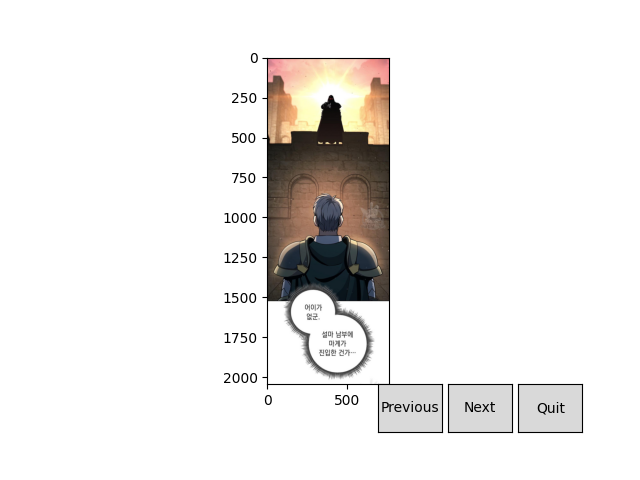

No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm: 53e6640bf16b43208de75a037ffc7166
No such comm:

In [5]:
'''
We need to draw boxes around all text in images
I tried to automate it, but pytesseract did not perform well for this.

Use next to go to the next image

At the end things will lag because it is 
doing OKR Optical Korean Recognition on each image
'''
drawer = ct.BoxDrawer(test)
drawer.draw()

In [6]:
'''
This method combines the full color image with the image used for OKR

This also makes it more expensive.
This might not be needed, but I do think it helps a lot.
'''
test.combine_gpt_and_ocr()

In [7]:
'''
pipe those images to the AI
prompt will be saved in raw_chapters/benchmark/prompts
response saved in raw_chapters/benchmark/response -and- /text

To re-do just one of the pages, delete the file in...

raw_chapters/benchmark/text/page_num_#.txt

'''
test.translate()

In [8]:
# pdf is formatted automatically
# It can be weird if your images are too big or small
test.make_pdf()

# this test may report 'failed response'
# check the response, sometimes GPT just says no.
